# Version information

In [1]:
from datetime import date
print("Running date:", date.today().strftime("%B %d, %Y"))
import pyleecan
print("Pyleecan version:" + pyleecan.__version__)
import SciDataTool
print("SciDataTool version:" + SciDataTool.__version__)

Running date: March 07, 2022
Pyleecan version:1.3.7
SciDataTool version:1.4.22


## 0) Introduction
The aim of surrogate-assisted optimization is to replace the objective function that could be expensive to evaluate,  by a gaussian process surrogate model. The principle is as follows: 


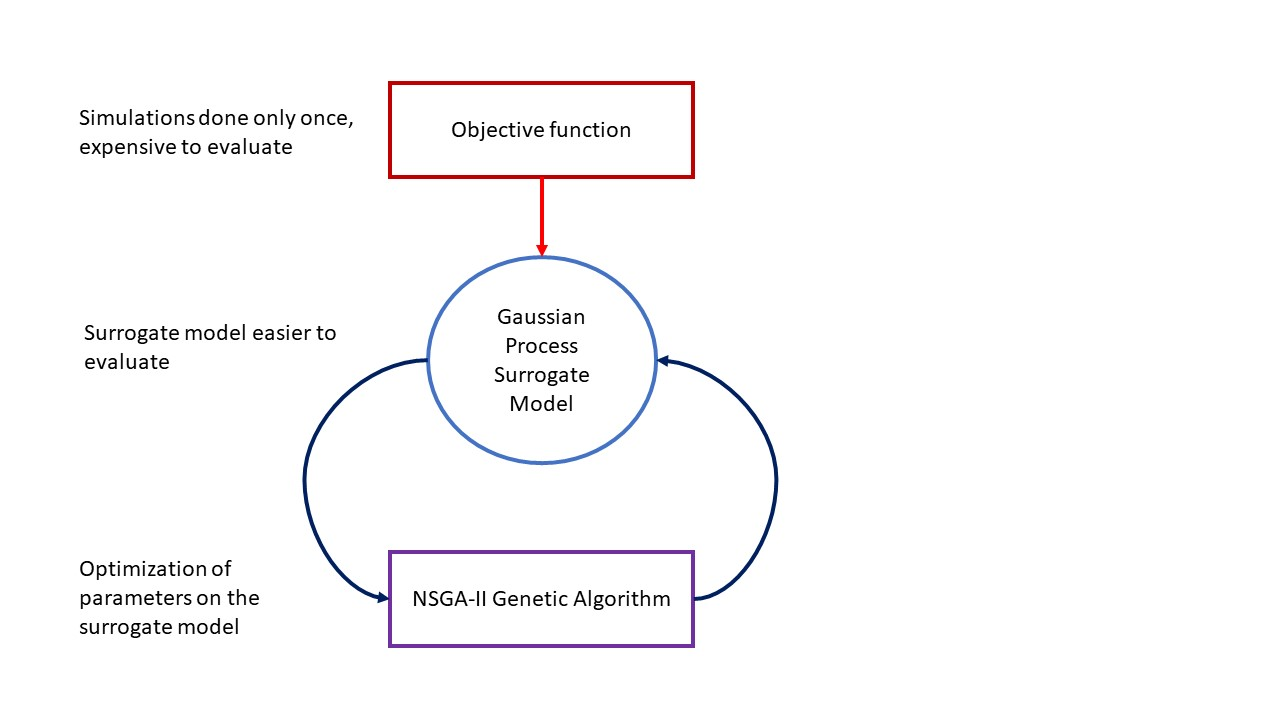

This tutorial will be organized as follows:
1. [Gaussian Process](#section_1)
2. [Surrogate-based Optimization](#section_2)

Along the tutorial, we will use an example of zdt3 to illustrate the concepts. 

<a id='section_1'></a>
## 1) Gaussian Process

Given an objective function $f$, $n$ sample points ${ (x_i) }_{i=1...n}$ are chosen to be evaluated to obtain $(f(x_i))$, denoted as $(y_i)$. A gaussian process on these sample points are a specific gaussian distribution defined as: 

$$
\begin{bmatrix}
y_1\\ \vdots \\
y_n
\end{bmatrix} \sim \mathcal{N}
\begin{pmatrix}
\begin{bmatrix}
m(y_1)\\ \vdots \\m(y_n)
\end{bmatrix} , 
\begin{bmatrix}
k(x_1, x_1) \dots k(x_1, x_n) \\
\vdots \ddots \vdots\\
k(x_n, x_1) \dots k(x_n, x_n)
\end{bmatrix}
\end{pmatrix}
$$

where m is the mean function and k is the covariance function, also known as kernel. 

A simpler notation is to define $X$ as $\begin{bmatrix} x_1 \dots x_n \end{bmatrix}^T $, then:

$$
f(X) \sim \mathcal{N}(m(X),k(X,X))
$$

The choice of the mean function is not often discussed, since the influence of the kernel choice is much more pronounced.

The kernel function models the covariance between each $x_i$ and $x_j$. Therefore, it needs to be symmetric and positive-definite. 

Making a choice on the kernel function can be viewed as setting a prior information on the distribution. This point of view could be interesting for the [second section](section_2), as fitting the gaussian model onto the function to construct a surrogate model could be seen as adding information from the reality to obtain a posterior.

<a id='section_2'></a>
## 2) Surrogate-based Optimization